In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# reading the data

data = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')
data

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 11 columns]

## Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
# printing unique counts in each column from 5th column to the last column.

for column in data.iloc[:, 5:].columns:
    unique_count = data[column].nunique()
    print(f'{column} : {unique_count}')

Rating : 5
Recommended IND : 2
Positive Feedback Count : 82
Division Name : 3
Department Name : 6
Class Name : 20


* From the above observation we can see that
  * There are 5 ratings 1-5
  * Recommended IND have 2 values `0 - not recommended`, `1 - recommended`
  * There are six departments - have to inspect if any of them are same and just have spelling mistakes
  * There are 3 divisions - same and should be inspected
  * There are 20 classes of product types.

In [ ]:
# pip install missingno

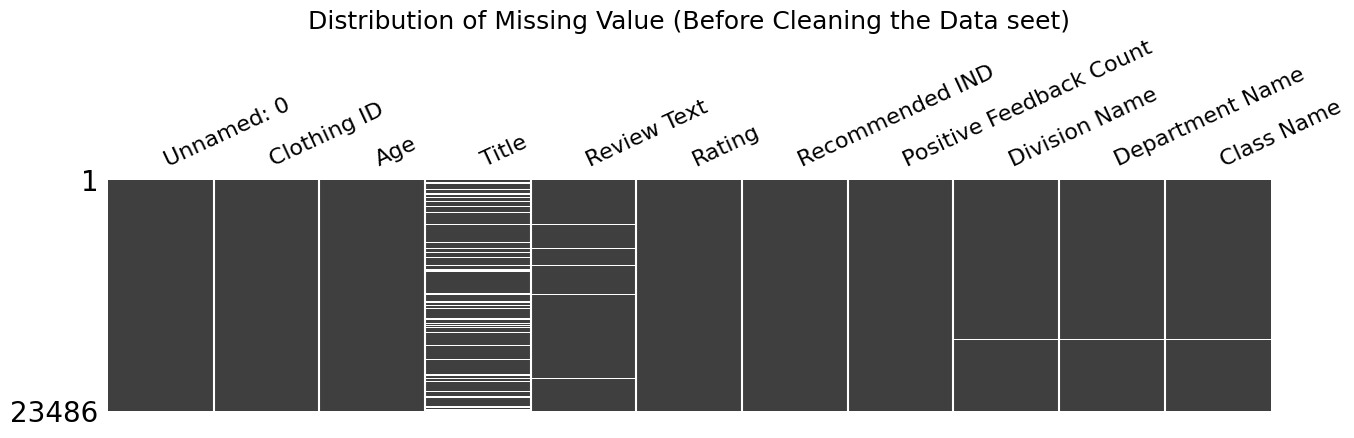

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,3))
msno.matrix(data, label_rotation=25, ax=ax)
ax.set_title('Distribution of Missing Value (Before Cleaning the Data seet)', fontsize=18)
plt.show()

We can see from the above diagram that
  * `Title` column has the most missing values
  * `Review Text` has some missing values
  * There are very few missing values in the columns `Division name`, `Department Name` and `Class Name`

In [ ]:
# Let us inspect the total number of missing values

data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

## Dealing with missing values

* We can see that there are many missing values in the `Title` column. But we will not focus on title column and we can fill some arbitary value such as `No Title` or simply replace with hyphen `-`
* We have to worry about missing values in `Review Text` column. If the percentage of columns having missing values is less than `5 %` we can go ahead and drop them.
* We can fill other columns with some arbitary value again such as `Not Given` or `Unknown`. we can't drop these because they might have review text which is the most important.

In [ ]:
# Let us see the percentage of missing values in `review text` column

rt_missing_count = data['Review Text'].isna().sum()
percentage = (rt_missing_count / len(data)) * 100

percentage

3.5978881035510515

In [ ]:
# Since it is less than 5% we can drop the missing values of review text column

data = data.dropna(subset=['Review Text'])

# We can replace other columns with Arbitary values
data['Division Name'].fillna('Not Given', inplace = True)
data['Department Name'].fillna('Not Given', inplace = True)
data['Class Name'].fillna('Not Given', inplace = True)
data['Title'].fillna('No Title', inplace = True)

In [ ]:
data.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [ ]:
data.shape

(22641, 11)

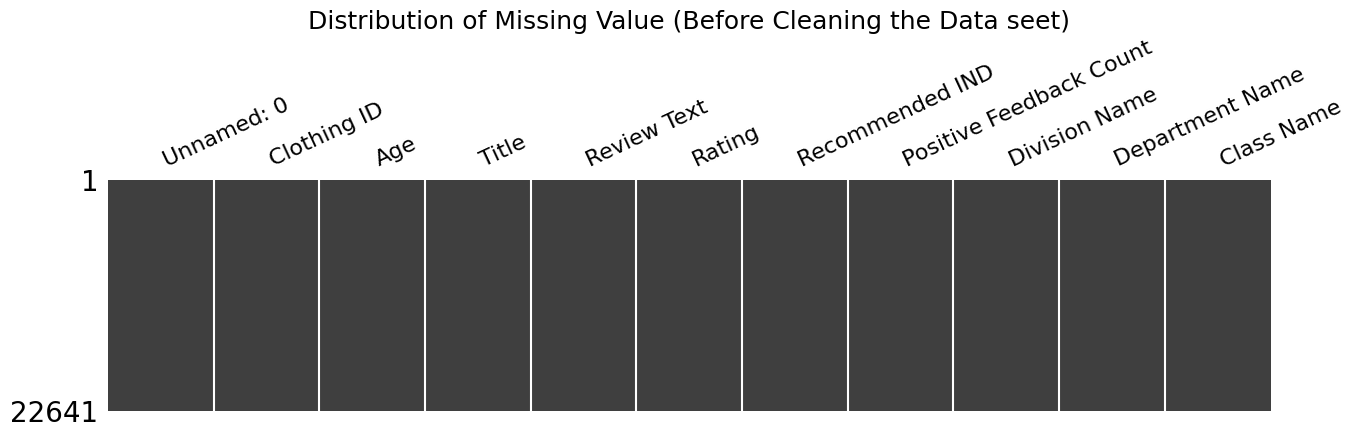

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,3))
msno.matrix(data, label_rotation=25, ax=ax)
ax.set_title('Distribution of Missing Value (Before Cleaning the Data seet)', fontsize=18)
plt.show()

## Checking for duplicates

In [ ]:
data[data.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, Clothing ID, Age, Title, Review Text, Rating, Recommended IND, Positive Feedback Count, Division Name, Department Name, Class Name]
Index: []

In [ ]:
dup_count = data.duplicated().sum()
print(f"Number of duplicate rows: {dup_count}")

Number of duplicate rows: 0


## Changing data column names

In [ ]:
data.columns = (data.columns
                .str.replace(' ', '_')
                .str.lower()
             )
data.columns

Index(['unnamed:_0', 'clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

## Dropping Un-necessary columns

In [ ]:
data.drop(columns = ['unnamed:_0'], inplace = True)
data.head()

clothing_id  age                    title  \
0          767   33                 No Title   
1         1080   34                 No Title   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         review_text  rating  recommended_ind  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   positive_feedback_count   division_name department_name class_name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
data.shape

(22641, 10)

## Data optimization

In [ ]:
data.dtypes  # 5 integer and two categorical

clothing_id                 int64
age                         int64
title                      object
review_text                object
rating                      int64
recommended_ind             int64
positive_feedback_count     int64
division_name              object
department_name            object
class_name                 object
dtype: object

In [ ]:
division_name_nonrepeating = data['division_name'].unique()
department_name_nonrepeating = data['department_name'].unique()
class_name_nonrepeating = data['class_name'].unique()

In [ ]:
division_name_nonrepeating

array(['Initmates', 'General', 'General Petite', 'Not Given'],
      dtype=object)

In [ ]:
department_name_nonrepeating

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend',
       'Not Given'], dtype=object)

In [ ]:
class_name_nonrepeating

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Not Given', 'Casual bottoms', 'Chemises'], dtype=object)

In [ ]:
# We can see that Intimates is mis-spelled at various columns.

data['division_name'] = data['division_name'].apply(lambda x: 'Intimates' if x == 'Initmates' else x)

In [ ]:
data['department_name'] = data['department_name'].apply(lambda x: 'Intimates' if x == 'Intimate' else x)

In [ ]:
division_name_nonrepeating = data['division_name'].unique()
department_name_nonrepeating = data['department_name'].unique()
class_name_nonrepeating = data['class_name'].unique()

In [ ]:
print('division names :', division_name_nonrepeating)
print('department names :', department_name_nonrepeating)
print('dclass names :', class_name_nonrepeating)

division names : ['Intimates' 'General' 'General Petite' 'Not Given']
department names : ['Intimates' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' 'Not Given']
dclass names : ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Not Given' 'Casual bottoms' 'Chemises']


In [ ]:
# converting these three columns into categories

data['division_name'] = data['division_name'].astype('category')
data['department_name'] = data['department_name'].astype('category')
data['class_name'] = data['class_name'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   clothing_id              22641 non-null  int64   
 1   age                      22641 non-null  int64   
 2   title                    22641 non-null  object  
 3   review_text              22641 non-null  object  
 4   rating                   22641 non-null  int64   
 5   recommended_ind          22641 non-null  int64   
 6   positive_feedback_count  22641 non-null  int64   
 7   division_name            22641 non-null  category
 8   department_name          22641 non-null  category
 9   class_name               22641 non-null  category
dtypes: category(3), int64(5), object(2)
memory usage: 1.4+ MB


## Data Description

In [ ]:
data.describe().T

count        mean         std   min    25%    50%  \
clothing_id              22641.0  919.332362  202.266874   1.0  861.0  936.0   
age                      22641.0   43.280376   12.326980  18.0   34.0   41.0   
rating                   22641.0    4.183561    1.115762   1.0    4.0    5.0   
recommended_ind          22641.0    0.818868    0.385136   0.0    1.0    1.0   
positive_feedback_count  22641.0    2.630582    5.786164   0.0    0.0    1.0   

                            75%     max  
clothing_id              1078.0  1205.0  
age                        52.0    99.0  
rating                      5.0     5.0  
recommended_ind             1.0     1.0  
positive_feedback_count     3.0   122.0

* We can interpret many results from the above table such as
  * the youngest is 18 y old and eldest is 99 y old
  * recommended_ind is like a classification with only 2 values
  * the least rating that a person can give is 1 and highest rating that a person can give is 5
  * age is `normally distributed` since mean is almost equal to median.

## Data Analysis and EDA

### Analysis of numeric columns

In [ ]:
data["recommended_ind"].value_counts(normalize=True) # normalizing for the percentage

1    0.818868
0    0.181132
Name: recommended_ind, dtype: float64

We have
  * `81.9%` yes(Recommended)
  * `18.1%` no (Not Recommended)

In [ ]:
recommended = (
    data['recommended_ind']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'recommended_ind':'Is_Recommended', 'count':'Count'})
    .replace([0, 1], ['No', 'Yes'])
          )

In [ ]:
recommended

index  Is_Recommended
0   Yes           18540
1    No            4101

In [ ]:
recommended['Percentage'] = recommended.iloc[:, 1].apply(lambda x: (x/recommended['Is_Recommended'].sum()) * 100)

In [ ]:
recommended

index  Is_Recommended  Percentage
0   Yes           18540   81.886842
1    No            4101   18.113158

In [ ]:
import plotly.express as px


fig = px.pie(recommended,
             names='index',
             values='Is_Recommended',
             hover_data=['Percentage'],
             title="<b>Recommended</b> Distribution")

colors = ['yellow','orange']
fig.update_traces(marker=dict(colors=colors, line=dict(color='white', width=1)),
                  textfont_size=20)

fig.update_layout(showlegend=False, title_x=0.5, font=dict(family="Rockwell, sans-serif", size=25, color='#000000'))

fig.show()


In [ ]:
data['age']

0        33
1        34
2        60
3        50
4        47
         ..
23481    34
23482    48
23483    31
23484    28
23485    52
Name: age, Length: 22641, dtype: int64

In [ ]:
# putting ages into frames

age_frame = (data['age']/10).astype('int').value_counts().sort_index()
age_frame

1      44
2    2795
3    7346
4    5903
5    3834
6    2256
7     355
8      94
9      14
Name: age, dtype: int64

In [ ]:
age_frame.index = age_frame.index.map(lambda x: f'{x*10}-{x*10+9}')
age_frame

10-19      44
20-29    2795
30-39    7346
40-49    5903
50-59    3834
60-69    2256
70-79     355
80-89      94
90-99      14
Name: age, dtype: int64

In [ ]:
age_distribution = px.bar(x = age_frame.index,
                          y = age_frame.values,
                          color = age_frame.index,
                          text = age_frame.values,
                          color_discrete_sequence = px.colors.sequential.Viridis_r,
                          template = "plotly_dark",
                          title = 'Distribution of Ages according to Age Frames')

age_distribution.update_traces(width=0.8)
age_distribution.update_layout(
    xaxis_title="Age buckets",
    yaxis_title="count per bucket",
    font=dict(size=20))

# marker line for large age bars
for index in range(2,5):
    age_distribution.data[index].marker.line.width = 4
    age_distribution.data[index].marker.line.color = "green"

age_distribution.show()

We can observe that 30-39 years are the most important target audiance.

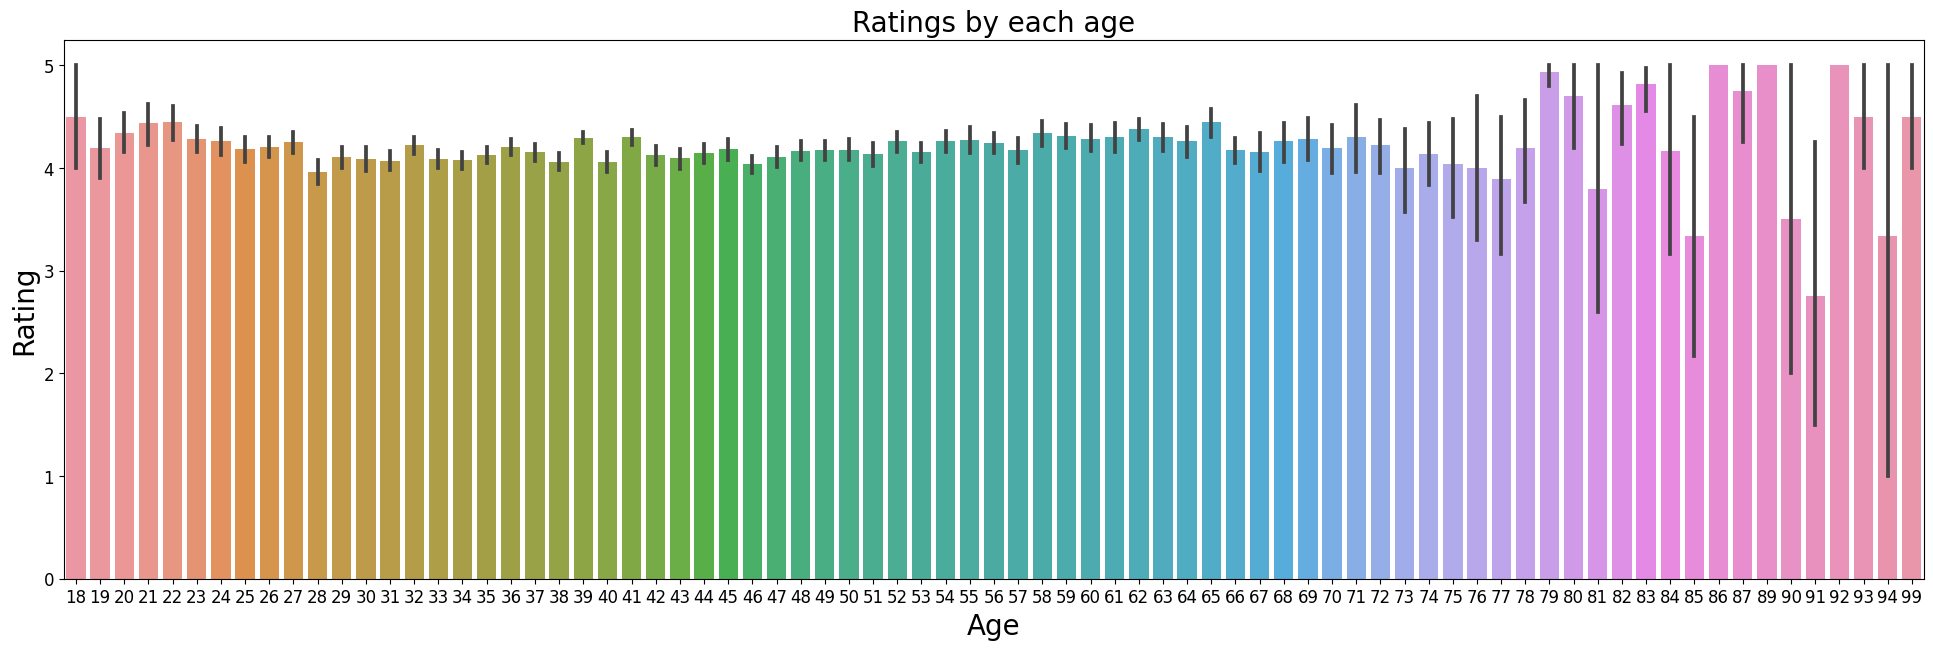

In [ ]:
plt.figure(figsize = (24,7))

sns.barplot(x = data['age'], y = data['rating'])


plt.xlabel('Age', fontsize=20);
plt.ylabel('Rating', fontsize=20);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12)
plt.title('Ratings by each age', fontsize=20)

plt.show();

All the age groups are almost giving same number of ratings.

91 < 85 < 94 < 90 - `lowest ratings` given with `highest error bars`. So we cannot consider this age group reviews for analysis.

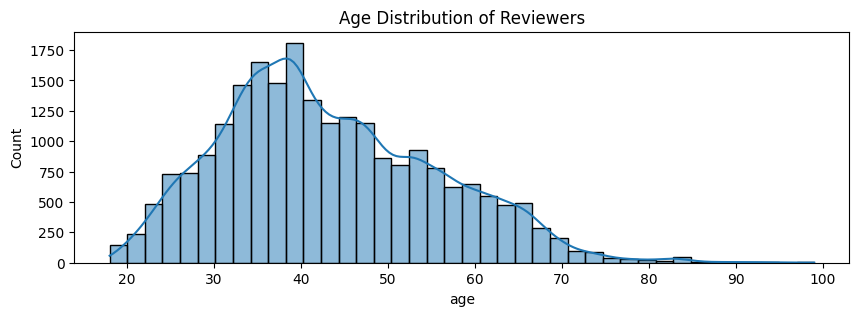

In [ ]:
plt.figure(figsize=(10, 3))

sns.histplot(data=data, x='age', bins=40, kde=True)

plt.title('Age Distribution of Reviewers')
plt.show()

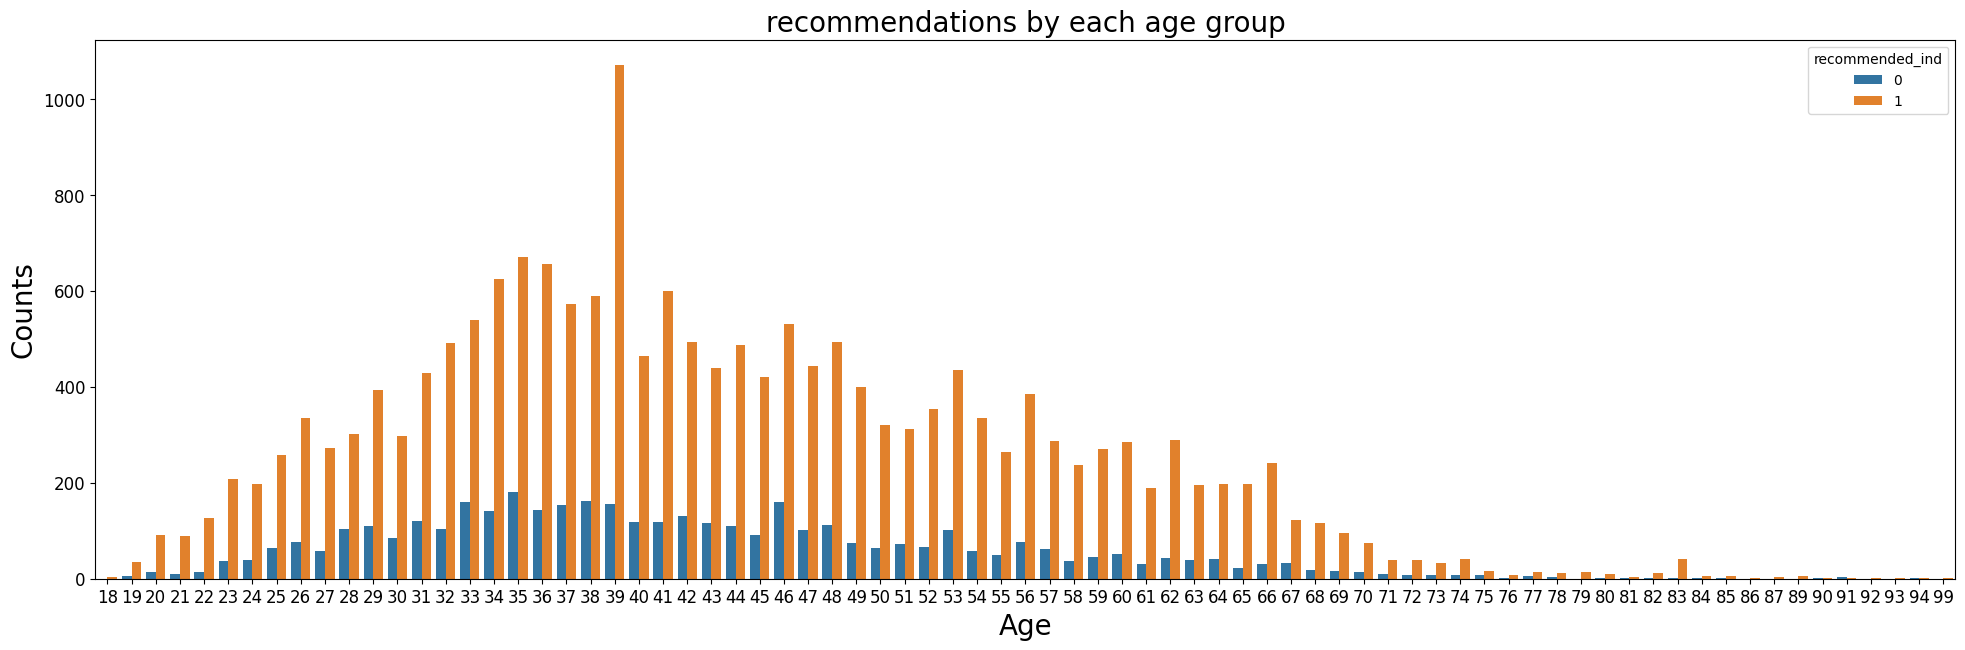

In [ ]:
plt.figure(figsize = (24,7))

sns.countplot(x = data['age'], hue = data['recommended_ind'])

plt.xlabel('Age', fontsize=20);
plt.ylabel('Counts', fontsize=20);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12)
plt.title('recommendations by each age group', fontsize=20)

plt.show()


From the above two diagrams we can see that images are exactly and nearly same in terms of proportions.

So we can say that `Recommendations` is `directly proportional` to `Purchase Power`

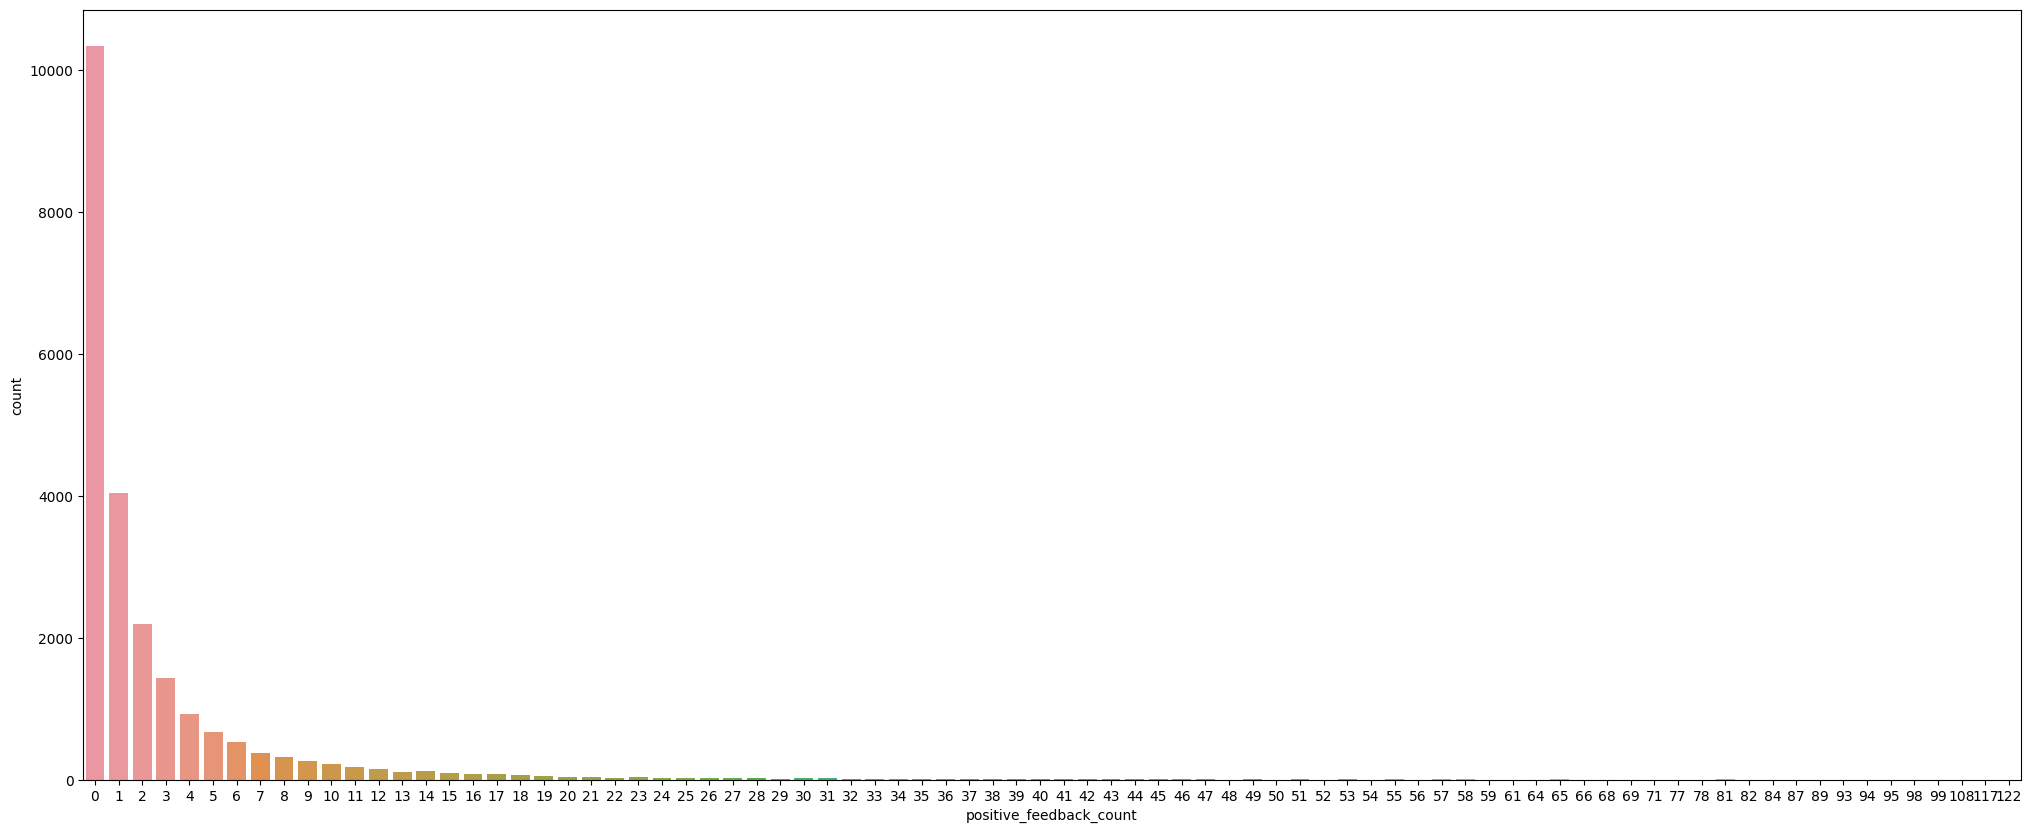

In [ ]:
plt.figure(figsize = (25,10))
sns.countplot(data, x = 'positive_feedback_count');

In the above diagram let us we can clearly see that values after 23 are very negligible. so we can cut the graph till 23 for better representation.

In [ ]:
data_c = data[data['positive_feedback_count'] < 24]

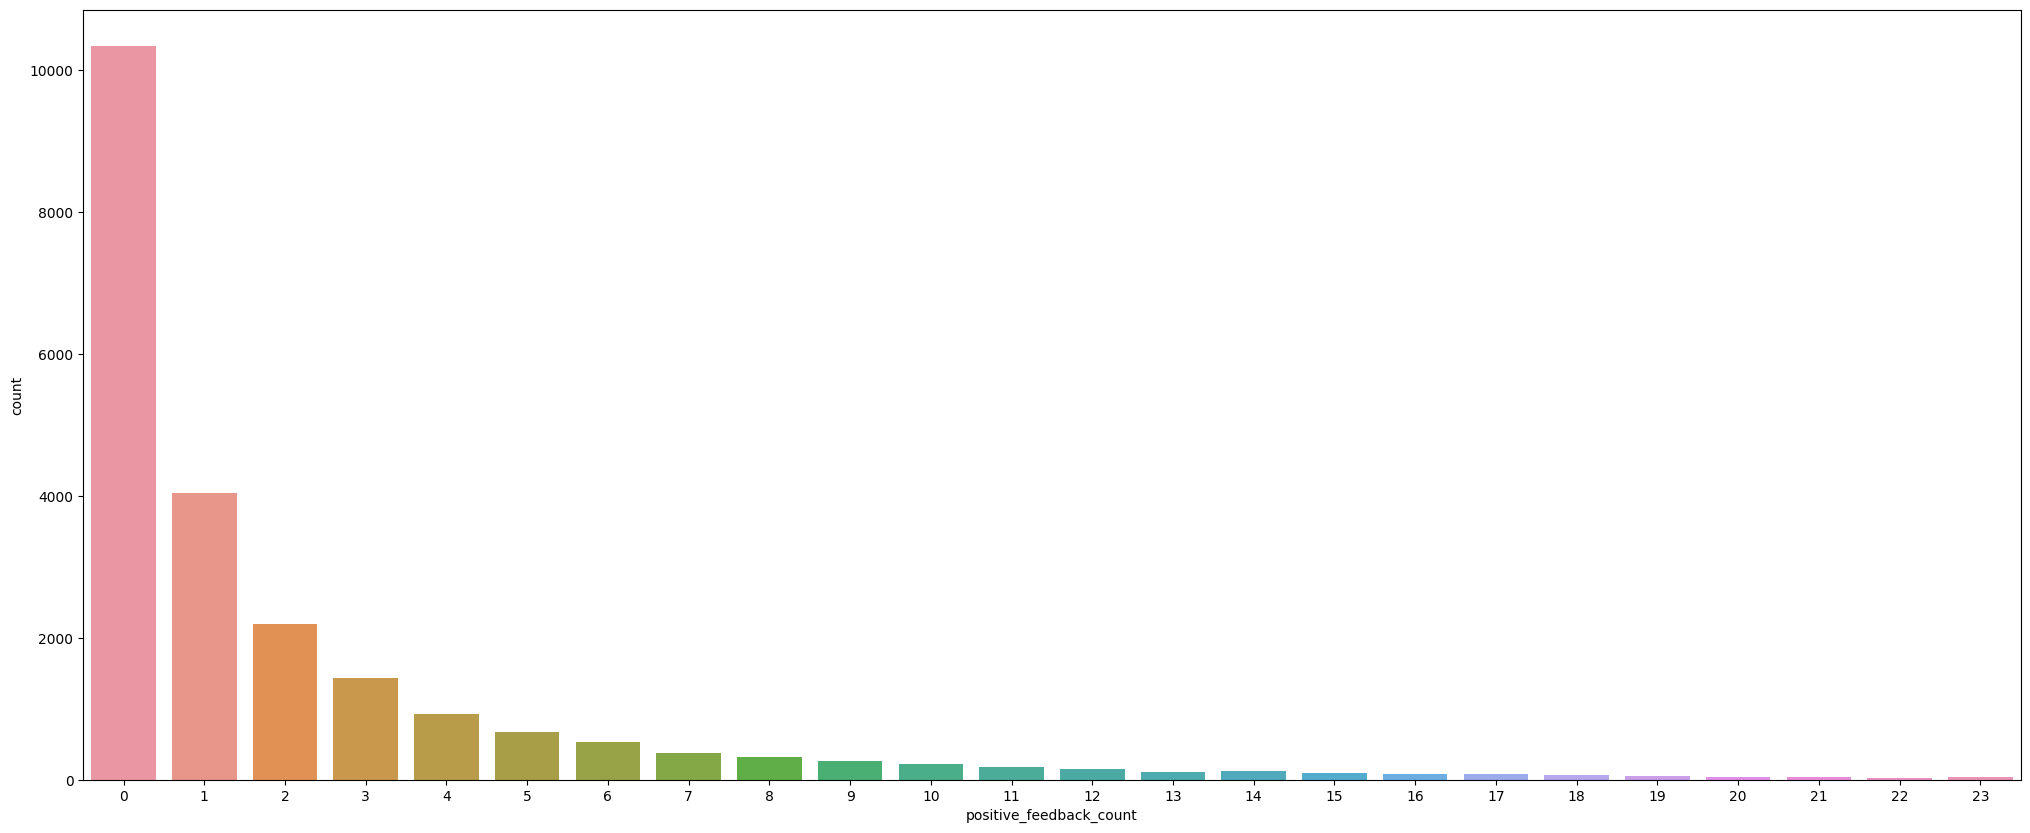

In [ ]:
plt.figure(figsize = (25,10))
sns.countplot(data_c, x = 'positive_feedback_count');

In [ ]:
pfbc_box = px.box(data['positive_feedback_count'],color_discrete_sequence=px.colors.sequential.Agsunset_r,
              orientation='h')
pfbc_box.update_layout(title = 'Box plot for Positive Feedback Count',
                   font = dict(size=17, family = 'Franklin Gothic'),template = "simple_white")
pfbc_box.show()

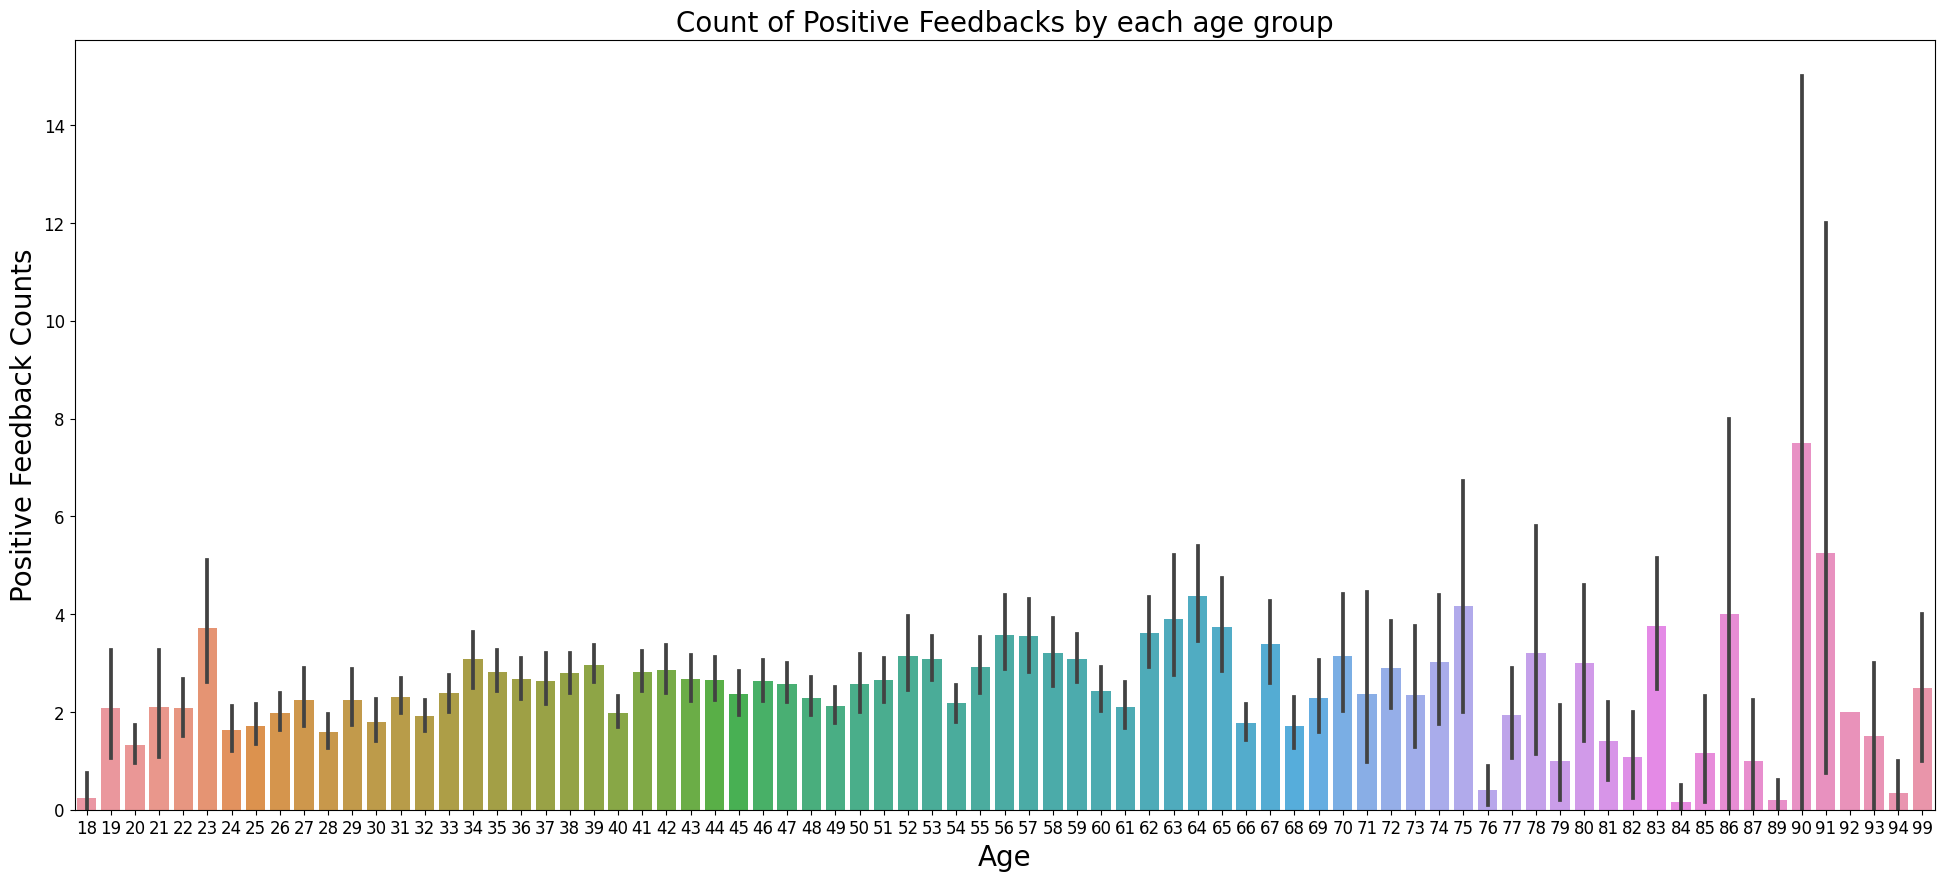

In [ ]:
plt.figure(figsize = (24,10))

sns.barplot(x = data['age'], y = data['positive_feedback_count'])

plt.xlabel('Age', fontsize=20);
plt.ylabel('Positive Feedback Counts', fontsize=20);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12)
plt.title('Count of Positive Feedbacks by each age group', fontsize=20)

plt.show()

the Age groups 86,90,91 have very high error bars. so we cannot rely on their positive feedbacks because of their fluctuating mindset.

### Analysis of Categorical columns

In [ ]:
cat_cols = data.describe(exclude =['float', 'int']).T

In [ ]:
cat_cols

count unique  \
title            22641  13993   
review_text      22641  22634   
division_name    22641      4   
department_name  22641      7   
class_name       22641     21   

                                                               top   freq  
title                                                     No Title   2966  
review_text      Perfect fit and i've gotten so many compliment...      3  
division_name                                              General  13365  
department_name                                               Tops  10048  
class_name                                                 Dresses   6145

In [ ]:
pivot_table = pd.pivot_table(data, values='class_name', index=['division_name', 'department_name'],
                             aggfunc=lambda x: x.unique())

In [ ]:
pivot_table

class_name
division_name  department_name                                                   
General        Bottoms          ['Pants', 'Skirts', 'Jeans', 'Shorts', 'Casual...
               Dresses          ['Dresses']
Categories (21, object): ['Blouses...
               Jackets          ['Outerwear', 'Jackets']
Categories (21, objec...
               Tops             ['Blouses', 'Sweaters', 'Knits', 'Fine gauge']...
               Trend            ['Trend']
Categories (21, object): ['Blouses',...
General Petite Bottoms          ['Pants', 'Skirts', 'Jeans']
Categories (21, o...
               Dresses          ['Dresses']
Categories (21, object): ['Blouses...
               Intimates        ['Lounge']
Categories (21, object): ['Blouses'...
               Jackets          ['Jackets', 'Outerwear']
Categories (21, objec...
               Tops             ['Knits', 'Blouses', 'Fine gauge', 'Sweaters']...
               Trend            ['Trend']
Categories (21, object): ['Blouses',...
Intimates      Intimates        ['Intimates', 'Lounge', 'Sleep', 'Swim', 'Legw...
Not Given      Not Given        ['Not Given']
Categories (21, object): ['Blous...

In [ ]:
data['class_name'].value_counts()

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Not Given           13
Casual bottoms       1
Chemises             1
Name: class_name, dtype: int64

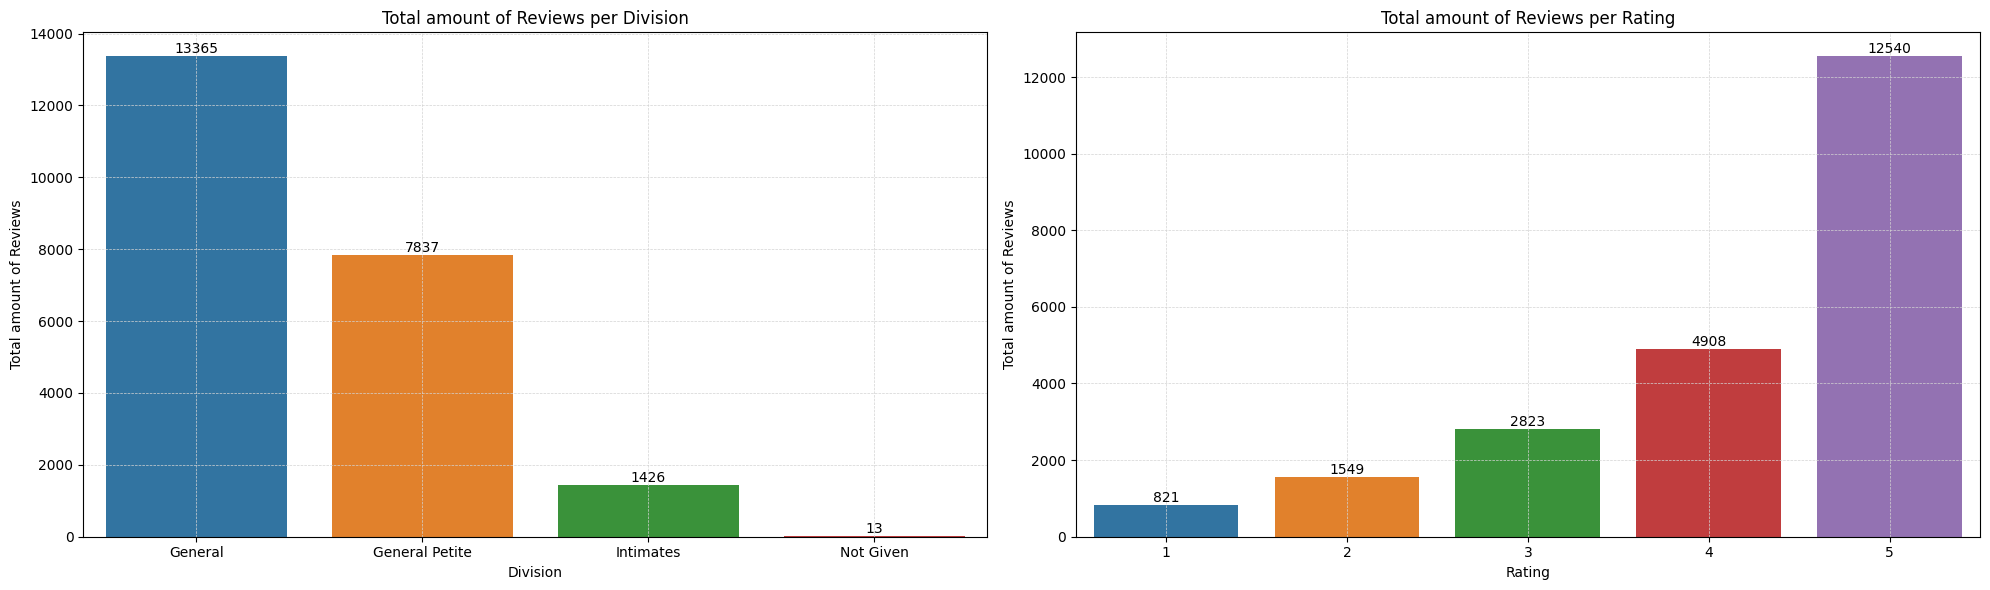

In [ ]:
row_plots = ["division_name", "rating"]

f, axes = plt.subplots(1, len(row_plots), figsize=(20,6), sharex=False)

# First plot: Total amount of Reviews per Division
division_counts = data['division_name'].value_counts().sort_index()
sns.barplot(x=division_counts.index, y=division_counts.values, ax=axes[0])

for i, count in enumerate(division_counts.values):
    axes[0].text(i, count, str(count), ha='center', va='bottom')

axes[0].set_xlabel('Division')
axes[0].set_ylabel('Total amount of Reviews')
axes[0].set_title('Total amount of Reviews per Division')
axes[0].grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0)

# Second plot: Total amount of Reviews per Rating
rating_counts = data['rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, ax=axes[1])

for i, count in enumerate(rating_counts.values):
    axes[1].text(i, count, str(count), ha='center', va='bottom')

axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Total amount of Reviews')
axes[1].set_title('Total amount of Reviews per Rating')
axes[1].grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0)


plt.tight_layout()
plt.show()

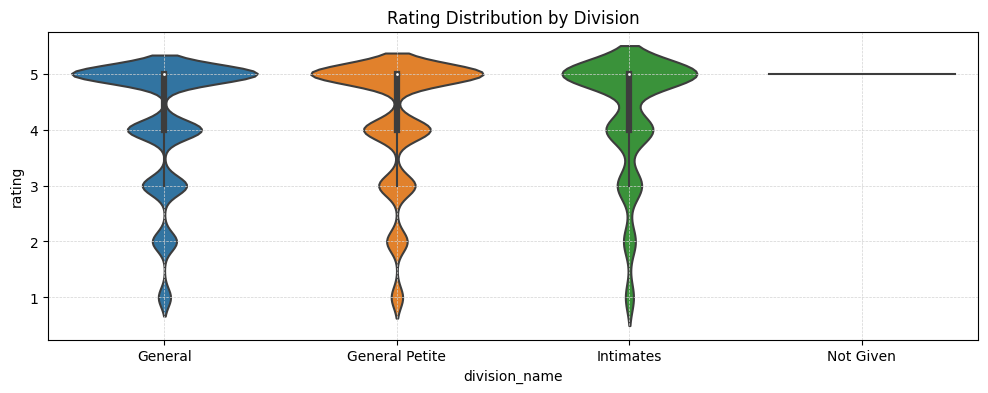

In [ ]:
plt.figure(figsize=(12, 4))

sns.violinplot(data=data, x='division_name', y='rating')

plt.title('Rating Distribution by Division')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0)
plt.show()

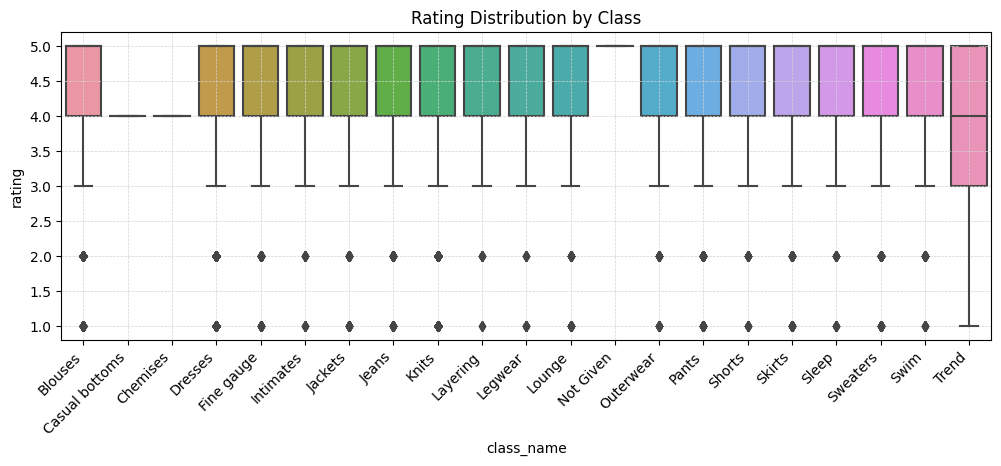

In [ ]:
plt.figure(figsize=(12, 4))

sns.boxplot(data=data, x='class_name', y='rating')

plt.title('Rating Distribution by Class')
plt.xticks(rotation=45, ha='right')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0)
plt.show()

`Trend` is the only class with most non - recommended responses that is rating 1.

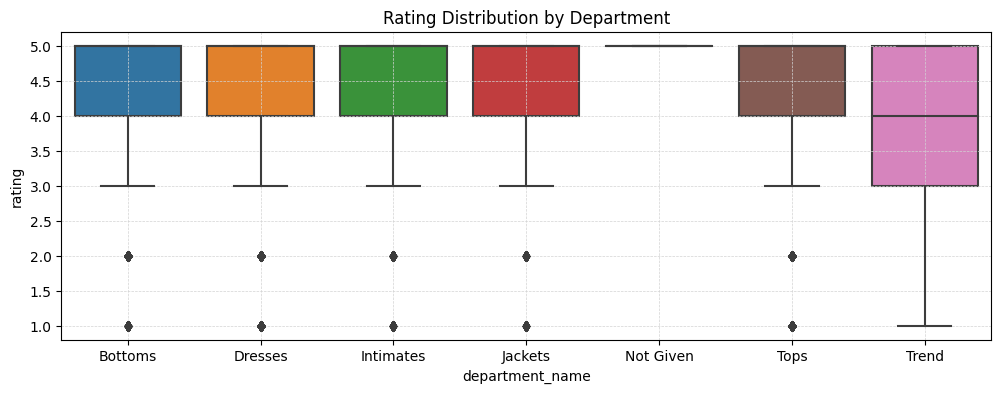

In [ ]:
plt.figure(figsize=(12, 4))

sns.boxplot(data=data, x='department_name', y='rating')

plt.title('Rating Distribution by Department')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0)
plt.show()

`Trend` again

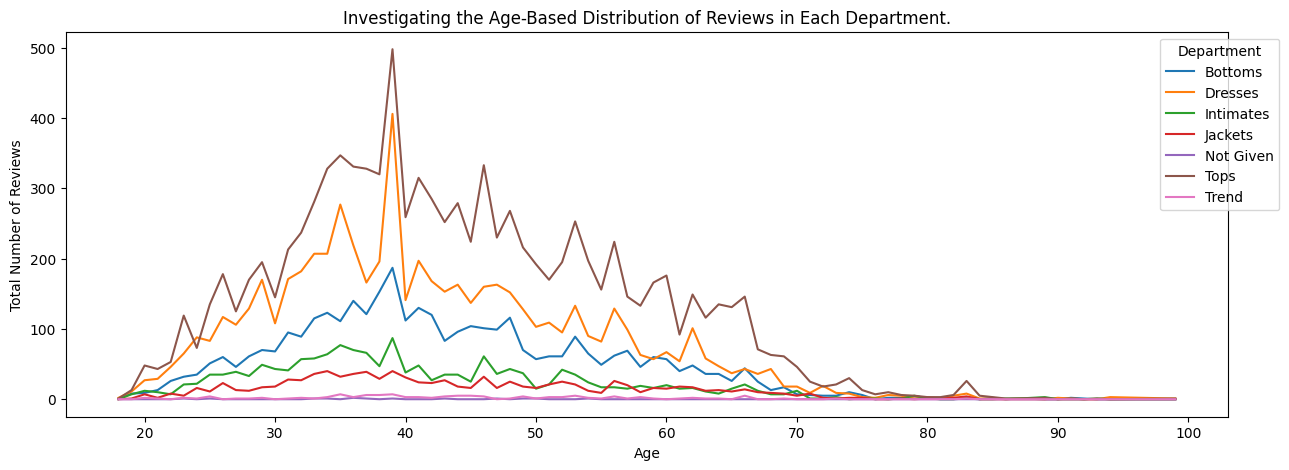

In [ ]:
dept_count_by_age = data.groupby(['department_name', 'age']).size().reset_index(name='Total_people')

plt.figure(figsize=(15, 5))

sns.lineplot(data=dept_count_by_age, x='age', y='Total_people', hue='department_name')

plt.xlabel('Age')
plt.ylabel('Total Number of Reviews')
plt.title('Investigating the Age-Based Distribution of Reviews in Each Department.')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper right')

plt.show()

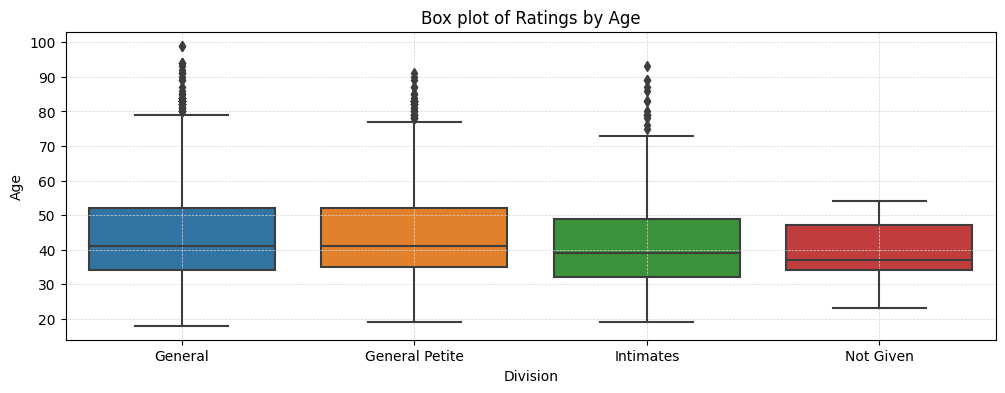

In [ ]:
plt.figure(figsize=(12, 4))

sns.boxplot(data=data, x='division_name', y='age')

plt.title('Box plot of Ratings by Age')
plt.xlabel('Division')
plt.ylabel('Age')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0)
plt.show()

* The oldest outlier in General is 100 years old, while its median age is 41.
* General Petite, meanwhile, has the same mean but a 91-year-old oldest outlier.
* Additionally, the age distribution per division reveals that the audience for the Intimates division is, on average, young
* The mean age is 39, and 75% of the Q3 is under the age of 50.
* Hence the youngest of the three divisions is `Intimates`.

In [ ]:
# pip install squarify

In [ ]:
fig = px.treemap(data,
                 path=['division_name','department_name','class_name'],
                 title = 'Tree Map',
                 color_discrete_sequence=px.colors.sequential.Viridis,
                 width=900, height=1200)

fig.update_traces(textinfo='label+value', textfont_size=18,
                  marker=dict(line=dict(color='white', width=0.3)))
fig.update_layout(font = dict(size=18, family = 'Franklin Gothic'))
fig.show()

In [ ]:
average_rating_by_department = data.groupby('department_name')['rating'].mean().reset_index()
average_rating_by_department

department_name    rating
0         Bottoms  4.278809
1         Dresses  4.138812
2       Intimates  4.271022
3         Jackets  4.254491
4       Not Given  5.000000
5            Tops  4.157743
6           Trend  3.838983

In [ ]:
average_rating_by_department = average_rating_by_department[average_rating_by_department['department_name'] != 'Not Given']
average_rating_by_department

department_name    rating
0         Bottoms  4.278809
1         Dresses  4.138812
2       Intimates  4.271022
3         Jackets  4.254491
5            Tops  4.157743
6           Trend  3.838983

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatterpolar(

    r=average_rating_by_department['rating'].tolist() + [average_rating_by_department['rating'].iloc[0]],
    theta=average_rating_by_department['department_name'].tolist() + [average_rating_by_department['department_name'].iloc[0]],
    fill='toself',
    name='Rating'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[3.5, 4.5]
        )),
    showlegend=True
)

fig.update_layout(title="Radar Chart for Department Ratings")

# Show the plot
fig.show()

## Deeper Analysis on Trend Column

In [ ]:
# We can see that Average rating of Trend column is so less and we can dig deep into the trend column now

In [ ]:
trend_df = data[data['class_name'] == 'Trend']
trend_df

clothing_id  age                                         title  \
187            596   41                                Modern comfort   
279            565   38                                      No Title   
703           1137   49                                 Simple luxury   
709           1137   69       The tee i have always been looking for!   
738           1137   66                                   Too cropped   
...            ...  ...                                           ...   
21958          567   34         Lovely but the cut/sizing is not good   
21980          567   57                                        Frompy   
23020          643   46                           Way too much fabric   
23051          643   44                                      Amazing!   
23326         1135   35  Beautiful cross between mensware and women's   

                                             review_text  rating  \
187    This easel caftan is simply amazing! the silho...       5   
279    Love, love, love this dress. it is very slimmi...       5   
703    I found this at my local store and ended up bu...       5   
709    It is seldom that i write a review about a tee...       5   
738    This runs small, i got the size 3 which fits l...       3   
...                                                  ...     ...   
21958  This is a beautiful spring/summer dress, and t...       2   
21980  I so wanted to like this dress i ordered it fo...       1   
23020  I wanted to love this jumpsuit. it looks adora...       2   
23051  I can't say enough about this jumpsuit. within...       5   
23326  I love this top, it is a cool style mix betwee...       5   

       recommended_ind  positive_feedback_count   division_name  \
187                  1                        2         General   
279                  1                        3  General Petite   
703                  1                        7         General   
709                  1                        1         General   
738                  1                        0         General   
...                ...                      ...             ...   
21958                0                        2         General   
21980                0                        1         General   
23020                0                        0         General   
23051                1                        1         General   
23326                1                        9         General   

      department_name class_name  
187             Trend      Trend  
279             Trend      Trend  
703             Trend      Trend  
709             Trend      Trend  
738             Trend      Trend  
...               ...        ...  
21958           Trend      Trend  
21980           Trend      Trend  
23020           Trend      Trend  
23051           Trend      Trend  
23326           Trend      Trend  

[118 rows x 10 columns]

In [ ]:
trend_df['division_name'].value_counts()

General           95
General Petite    23
Intimates          0
Not Given          0
Name: division_name, dtype: int64

In [ ]:
import pandas as pd

grouped_data = trend_df.groupby(['division_name', 'class_name']).agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean'),
    rating_min=('rating', 'min'),
    rating_max=('rating', 'max'),
    unique_clothing_id=('clothing_id', pd.Series.nunique)
)

In [ ]:
grouped_data

rating_count  rating_mean  rating_min  \
division_name class_name                                              
General       Blouses                    0          NaN         NaN   
              Casual bottoms             0          NaN         NaN   
              Chemises                   0          NaN         NaN   
              Dresses                    0          NaN         NaN   
              Fine gauge                 0          NaN         NaN   
...                                    ...          ...         ...   
Not Given     Skirts                     0          NaN         NaN   
              Sleep                      0          NaN         NaN   
              Sweaters                   0          NaN         NaN   
              Swim                       0          NaN         NaN   
              Trend                      0          NaN         NaN   

                              rating_max  unique_clothing_id  
division_name class_name                                      
General       Blouses                NaN                 NaN  
              Casual bottoms         NaN                 NaN  
              Chemises               NaN                 NaN  
              Dresses                NaN                 NaN  
              Fine gauge             NaN                 NaN  
...                                  ...                 ...  
Not Given     Skirts                 NaN                 NaN  
              Sleep                  NaN                 NaN  
              Sweaters               NaN                 NaN  
              Swim                   NaN                 NaN  
              Trend                  NaN                 NaN  

[84 rows x 5 columns]

In [ ]:
sorted_data = grouped_data.sort_values(by='rating_mean')
sorted_data

rating_count  rating_mean  rating_min  \
division_name  class_name                                              
General Petite Trend                     23     3.782609         1.0   
General        Trend                     95     3.852632         1.0   
               Blouses                    0          NaN         NaN   
               Casual bottoms             0          NaN         NaN   
               Chemises                   0          NaN         NaN   
...                                     ...          ...         ...   
Not Given      Skirts                     0          NaN         NaN   
               Sleep                      0          NaN         NaN   
               Sweaters                   0          NaN         NaN   
               Swim                       0          NaN         NaN   
               Trend                      0          NaN         NaN   

                               rating_max  unique_clothing_id  
division_name  class_name                                      
General Petite Trend                  5.0                 7.0  
General        Trend                  5.0                35.0  
               Blouses                NaN                 NaN  
               Casual bottoms         NaN                 NaN  
               Chemises               NaN                 NaN  
...                                   ...                 ...  
Not Given      Skirts                 NaN                 NaN  
               Sleep                  NaN                 NaN  
               Sweaters               NaN                 NaN  
               Swim                   NaN                 NaN  
               Trend                  NaN                 NaN  

[84 rows x 5 columns]

In [ ]:
final_data = grouped_data[grouped_data['rating_count'] > 0]
display(final_data)

rating_count  rating_mean  rating_min  rating_max  \
division_name  class_name                                                      
General        Trend                 95     3.852632         1.0         5.0   
General Petite Trend                 23     3.782609         1.0         5.0   

                           unique_clothing_id  
division_name  class_name                      
General        Trend                     35.0  
General Petite Trend                      7.0

## Text Length Analysis for Recommended & Not Recommended

In [ ]:
# creating a new column called text_length from the review text

data['text_length'] = data['review_text'].astype('str').apply(len)

In [ ]:
data.head()

clothing_id  age                    title  \
0          767   33                 No Title   
1         1080   34                 No Title   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         review_text  rating  recommended_ind  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   positive_feedback_count   division_name department_name class_name  \
0                        0       Intimates       Intimates  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

   text_length  
0           53  
1          303  
2          500  
3          124  
4          192

In [ ]:
import plotly.figure_factory as ff

textlength_diag = ff.create_distplot(hist_data = [data[data['recommended_ind'] == 0]['review_text'].apply(len),
                                                  data[data['recommended_ind'] == 1]['review_text'].apply(len)],
                         group_labels = ['Length of Unrecommended Texts', 'Length of Recommended Texts'],
                         show_hist = False, colors=['#2E4057', '#99C24D'])
textlength_diag.update_layout(title = 'Length of Text V/S Recommended Integer',
                  font = dict(size=17, family = 'Franklin Gothic'),template = "simple_white")
textlength_diag.show()

# MODELLING

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('punkt')

stopword = set(stopwords.words('english'))

def preprocessing(text):
  tokens = word_tokenize(text.lower())
  filtered_text = [word for word in tokens if word.isalpha() and word not in stopword]
  return " ".join(filtered_text)

data['review_text'] = data['review_text'].apply(preprocessing)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data['text_length'] = data['review_text'].astype('str').apply(len)

In [ ]:
data

clothing_id  age                                              title  \
0              767   33                                           No Title   
1             1080   34                                           No Title   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             review_text  rating  \
0            absolutely wonderful silky sexy comfortable       4   
1      love dress sooo pretty happened find store gla...       5   
2      high hopes dress really wanted work initially ...       3   
3      love love love jumpsuit fun flirty fabulous ev...       5   
4      shirt flattering due adjustable front tie perf...       5   
...                                                  ...     ...   
23481  happy snag dress great price easy slip flatter...       5   
23482  reminds maternity clothes soft stretchy shiny ...       3   
23483  fit well top see never would worked glad able ...       3   
23484  bought dress wedding summer cute unfortunately...       3   
23485  dress lovely platinum feminine fits perfectly ...       5   

       recommended_ind  positive_feedback_count   division_name  \
0                    1                        0       Intimates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      department_name class_name  text_length  
0           Intimates  Intimates           43  
1             Dresses    Dresses          178  
2             Dresses    Dresses          300  
3             Bottoms      Pants           89  
4                Tops    Blouses          112  
...               ...        ...          ...  
23481         Dresses    Dresses           65  
23482            Tops      Knits          161  
23483         Dresses    Dresses           97  
23484         Dresses    Dresses          241  
23485         Dresses    Dresses           78  

[22641 rows x 11 columns]

In [ ]:
# Text lengths after removing stop words

textlength_diag_after = ff.create_distplot(hist_data = [data[data['recommended_ind'] == 0]['review_text'].apply(len),
                                                  data[data['recommended_ind'] == 1]['review_text'].apply(len)],
                         group_labels = ['Length of Unrecommended Texts', 'Length of Recommended Texts'],
                         show_hist = False, colors=['#2E4057', '#99C24D'])
textlength_diag_after.update_layout(title = 'Length of Text V/S Recommended Integer',
                  font = dict(size=17, family = 'Franklin Gothic'),template = "simple_white")
textlength_diag_after.show()

In [ ]:
data.dtypes

clothing_id                   int64
age                           int64
title                        object
review_text                  object
rating                        int64
recommended_ind               int64
positive_feedback_count       int64
division_name              category
department_name            category
class_name                 category
text_length                   int64
dtype: object

In [ ]:
# pip install wordcloud

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
data['review_text'] = data['review_text'].fillna('')
vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    count = {}
    if analyzer(s):
        word_index = {}
        w = vectorizer.fit_transform([s]).toarray()
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            word_index[v]=k
        for index,i in enumerate(w[0]):
            count[word_index[index]] = i
    return  count

data['wordcounts'] = data['review_text'].apply(wordcounts)
data.head()

clothing_id  age                    title  \
0          767   33                 No Title   
1         1080   34                 No Title   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         review_text  rating  recommended_ind  \
0        absolutely wonderful silky sexy comfortable       4                1   
1  love dress sooo pretty happened find store gla...       5                1   
2  high hopes dress really wanted work initially ...       3                0   
3  love love love jumpsuit fun flirty fabulous ev...       5                1   
4  shirt flattering due adjustable front tie perf...       5                1   

   positive_feedback_count   division_name department_name class_name  \
0                        0       Intimates       Intimates  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

   text_length                                         wordcounts  
0           43  {'absolutely': 1, 'comfortable': 1, 'sexy': 1,...  
1          178  {'bc': 2, 'bought': 1, 'definitely': 1, 'dress...  
2          300  {'bottom': 1, 'cheap': 1, 'comfortable': 1, 'c...  
3           89  {'compliments': 1, 'every': 1, 'fabulous': 1, ...  
4          112  {'adjustable': 1, 'cardigan': 1, 'due': 1, 'fl...

In [ ]:
word_data = data[['review_text', 'wordcounts' ,'rating','recommended_ind', 'positive_feedback_count']]
word_data.head()

review_text  \
0        absolutely wonderful silky sexy comfortable   
1  love dress sooo pretty happened find store gla...   
2  high hopes dress really wanted work initially ...   
3  love love love jumpsuit fun flirty fabulous ev...   
4  shirt flattering due adjustable front tie perf...   

                                          wordcounts  rating  recommended_ind  \
0  {'absolutely': 1, 'comfortable': 1, 'sexy': 1,...       4                1   
1  {'bc': 2, 'bought': 1, 'definitely': 1, 'dress...       5                1   
2  {'bottom': 1, 'cheap': 1, 'comfortable': 1, 'c...       3                0   
3  {'compliments': 1, 'every': 1, 'fabulous': 1, ...       5                1   
4  {'adjustable': 1, 'cardigan': 1, 'due': 1, 'fl...       5                1   

   positive_feedback_count  
0                        0  
1                        4  
2                        0  
3                        0  
4                        6

In [ ]:
word_data['wordcounts']

0        {'absolutely': 1, 'comfortable': 1, 'sexy': 1,...
1        {'bc': 2, 'bought': 1, 'definitely': 1, 'dress...
2        {'bottom': 1, 'cheap': 1, 'comfortable': 1, 'c...
3        {'compliments': 1, 'every': 1, 'fabulous': 1, ...
4        {'adjustable': 1, 'cardigan': 1, 'due': 1, 'fl...
                               ...                        
23481    {'color': 1, 'combo': 1, 'cut': 1, 'dress': 1,...
23482    {'awkward': 1, 'button': 1, 'close': 1, 'cloth...
23483    {'able': 1, 'different': 1, 'fabric': 1, 'fit'...
23484    {'big': 1, 'bought': 1, 'bust': 1, 'cheaper': ...
23485    {'comfy': 1, 'dress': 1, 'easy': 1, 'feminine'...
Name: wordcounts, Length: 22641, dtype: object

In [ ]:
from collections import Counter

combined_counter = Counter()

# Assuming word_data['wordcounts'] is a list of Counter objects
for word_count in word_data['wordcounts']:
    combined_counter.update(word_count)

# Keep track of the top 25 frequencies
top_25_frequencies = Counter()

for word, frequency in combined_counter.items():
    top_25_frequencies[word] = max(top_25_frequencies[word], frequency)

# Get the top 25 words with the highest frequency
top_25_words = top_25_frequencies.most_common(25)

for word, max_frequency in top_25_words:
    print(f"Word: {word}, Frequency: {max_frequency}")

Word: dress, Frequency: 10497
Word: love, Frequency: 8940
Word: size, Frequency: 8700
Word: top, Frequency: 7348
Word: fit, Frequency: 7275
Word: like, Frequency: 7010
Word: wear, Frequency: 6422
Word: great, Frequency: 6100
Word: would, Frequency: 5428
Word: fabric, Frequency: 4778
Word: small, Frequency: 4565
Word: color, Frequency: 4561
Word: look, Frequency: 4019
Word: really, Frequency: 3924
Word: ordered, Frequency: 3835
Word: little, Frequency: 3773
Word: perfect, Frequency: 3758
Word: one, Frequency: 3607
Word: flattering, Frequency: 3485
Word: soft, Frequency: 3321
Word: well, Frequency: 3234
Word: back, Frequency: 3182
Word: comfortable, Frequency: 3047
Word: cute, Frequency: 3030
Word: nice, Frequency: 3016


In [ ]:
from collections import Counter

combined_counter = Counter()
for word_count in word_data['wordcounts']:
    combined_counter.update(word_count)

max_frequencies = {}
for word, frequency in combined_counter.items():
    if word not in max_frequencies or frequency > max_frequencies[word]:
        max_frequencies[word] = frequency

# sorted_words = sorted(max_frequencies.items(), key=lambda item: item[1], reverse=True)

# for word, max_frequency in sorted_words:
#     print(f"Word: {word}, Frequency: {max_frequency}")

In [ ]:
def sentiment_classification(rating):
  if rating >= 4:
    return 'positive'
  elif rating == 3:
    return 'neutral'
  else:
    return 'negative'

data['sentiment'] = data['rating'].apply(sentiment_classification)
data

clothing_id  age                                              title  \
0              767   33                                           No Title   
1             1080   34                                           No Title   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             review_text  rating  \
0            absolutely wonderful silky sexy comfortable       4   
1      love dress sooo pretty happened find store gla...       5   
2      high hopes dress really wanted work initially ...       3   
3      love love love jumpsuit fun flirty fabulous ev...       5   
4      shirt flattering due adjustable front tie perf...       5   
...                                                  ...     ...   
23481  happy snag dress great price easy slip flatter...       5   
23482  reminds maternity clothes soft stretchy shiny ...       3   
23483  fit well top see never would worked glad able ...       3   
23484  bought dress wedding summer cute unfortunately...       3   
23485  dress lovely platinum feminine fits perfectly ...       5   

       recommended_ind  positive_feedback_count   division_name  \
0                    1                        0       Intimates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      department_name class_name  text_length  \
0           Intimates  Intimates           43   
1             Dresses    Dresses          178   
2             Dresses    Dresses          300   
3             Bottoms      Pants           89   
4                Tops    Blouses          112   
...               ...        ...          ...   
23481         Dresses    Dresses           65   
23482            Tops      Knits          161   
23483         Dresses    Dresses           97   
23484         Dresses    Dresses          241   
23485         Dresses    Dresses           78   

                                              wordcounts sentiment  
0      {'absolutely': 1, 'comfortable': 1, 'sexy': 1,...  positive  
1      {'bc': 2, 'bought': 1, 'definitely': 1, 'dress...  positive  
2      {'bottom': 1, 'cheap': 1, 'comfortable': 1, 'c...   neutral  
3      {'compliments': 1, 'every': 1, 'fabulous': 1, ...  positive  
4      {'adjustable': 1, 'cardigan': 1, 'due': 1, 'fl...  positive  
...                                                  ...       ...  
23481  {'color': 1, 'combo': 1, 'cut': 1, 'dress': 1,...  positive  
23482  {'awkward': 1, 'button': 1, 'close': 1, 'cloth...   neutral  
23483  {'able': 1, 'different': 1, 'fabric': 1, 'fit'...   neutral  
23484  {'big': 1, 'bought': 1, 'bust': 1, 'cheaper': ...   neutral  
23485  {'comfy': 1, 'dress': 1, 'easy': 1, 'feminine'...  positive  

[22641 rows x 13 columns]

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, train_size=0.7, random_state=42)

X_train = vectorizer.fit_transform(train_data['review_text'])
Y_train = train_data['sentiment']
X_test = vectorizer.fit_transform(train_data['review_text'])
Y_test = train_data['sentiment']

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix

bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

predictions_bnb = bnb.predict(X_test)

accuracy_bnb = accuracy_score(Y_test, predictions_bnb)
print(f'Bernoulli Naive Bayes Accuracy: {accuracy_bnb}')

conf_matrix_bnb = confusion_matrix(Y_test, predictions_bnb)
print('Bernoulli Naive Bayes Confusion Matrix:')
print(conf_matrix_bnb)

Bernoulli Naive Bayes Accuracy: 0.8563856638061585
Bernoulli Naive Bayes Confusion Matrix:
[[  927   192   562]
 [   84   983   882]
 [  105   451 11662]]


In [ ]:
from sklearn.metrics import classification_report

classification_rep = classification_report(Y_test, predictions_bnb)
print('Classification Report for Bernoulli Naive Bayes:')
print(classification_rep)

Classification Report for Bernoulli Naive Bayes:
              precision    recall  f1-score   support

    negative       0.83      0.55      0.66      1681
     neutral       0.60      0.50      0.55      1949
    positive       0.89      0.95      0.92     12218

    accuracy                           0.86     15848
   macro avg       0.78      0.67      0.71     15848
weighted avg       0.85      0.86      0.85     15848



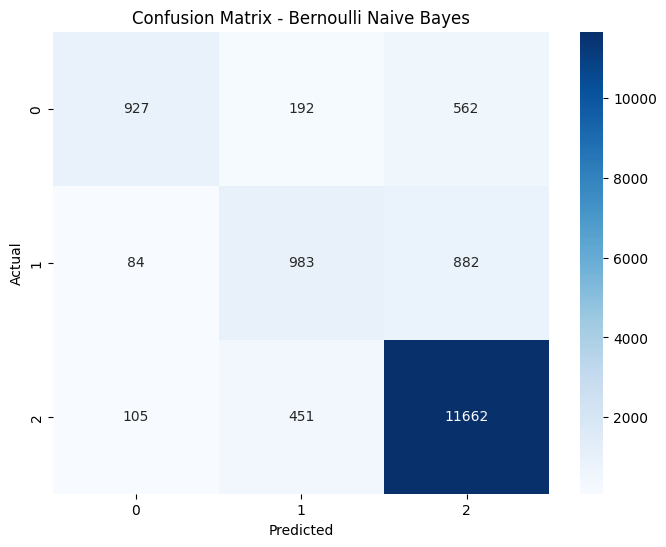

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Bernoulli Naive Bayes')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression


logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, Y_train)

predictions = logistic.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(Y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9504038364462393
Confusion Matrix:
[[ 1475    67   139]
 [   80  1496   373]
 [   37    90 12091]]


In [ ]:
classification_rep = classification_report(Y_test, predictions)
print('Classification Report for Logistic Regression:')
print(classification_rep)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.93      0.88      0.90      1681
     neutral       0.91      0.77      0.83      1949
    positive       0.96      0.99      0.97     12218

    accuracy                           0.95     15848
   macro avg       0.93      0.88      0.90     15848
weighted avg       0.95      0.95      0.95     15848



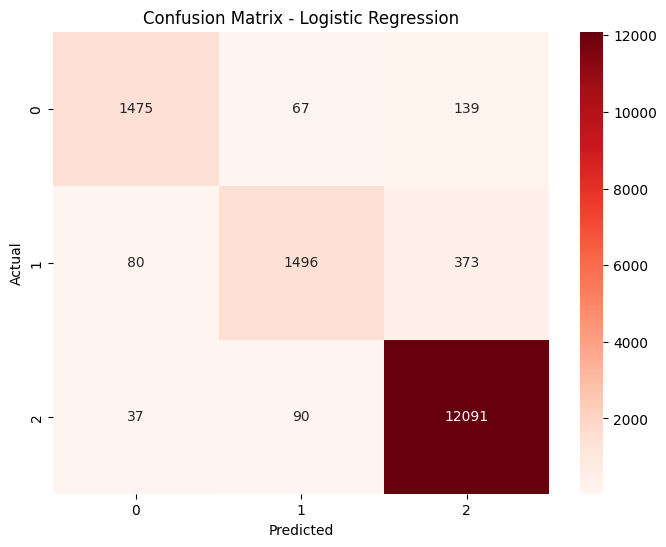

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, Y_train)

predictions_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(Y_test, predictions_svm)
print(f'SVM Accuracy: {accuracy_svm}')

conf_matrix_svm = confusion_matrix(Y_test, predictions_svm)
print('SVM Confusion Matrix:')
print(conf_matrix_svm)

SVM Accuracy: 0.9374053508329127
SVM Confusion Matrix:
[[ 1375    40   266]
 [   81  1293   575]
 [   15    15 12188]]


In [ ]:
classification_rep_svm = classification_report(Y_test, predictions_svm)
print('Classification Report for SVM:')
print(classification_rep_svm)

Classification Report for SVM:
              precision    recall  f1-score   support

    negative       0.93      0.82      0.87      1681
     neutral       0.96      0.66      0.78      1949
    positive       0.94      1.00      0.97     12218

    accuracy                           0.94     15848
   macro avg       0.94      0.83      0.87     15848
weighted avg       0.94      0.94      0.93     15848



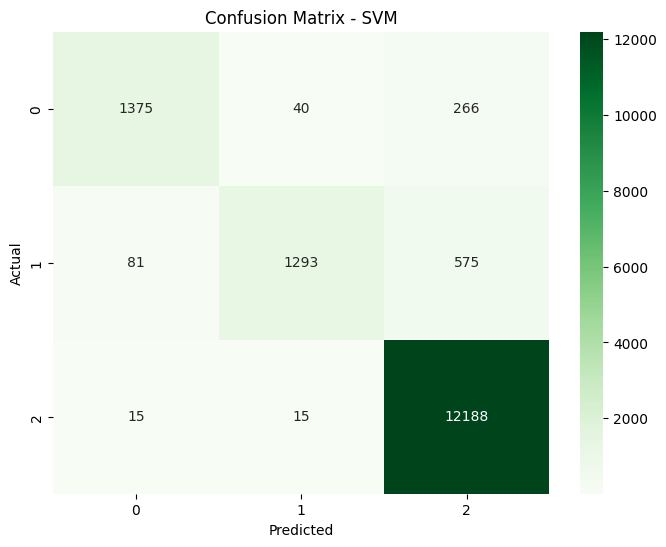

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

In [ ]:
data

clothing_id  age                                              title  \
0              767   33                                           No Title   
1             1080   34                                           No Title   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             review_text  rating  \
0            absolutely wonderful silky sexy comfortable       4   
1      love dress sooo pretty happened find store gla...       5   
2      high hopes dress really wanted work initially ...       3   
3      love love love jumpsuit fun flirty fabulous ev...       5   
4      shirt flattering due adjustable front tie perf...       5   
...                                                  ...     ...   
23481  happy snag dress great price easy slip flatter...       5   
23482  reminds maternity clothes soft stretchy shiny ...       3   
23483  fit well top see never would worked glad able ...       3   
23484  bought dress wedding summer cute unfortunately...       3   
23485  dress lovely platinum feminine fits perfectly ...       5   

       recommended_ind  positive_feedback_count   division_name  \
0                    1                        0       Intimates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      department_name class_name  text_length  \
0           Intimates  Intimates           43   
1             Dresses    Dresses          178   
2             Dresses    Dresses          300   
3             Bottoms      Pants           89   
4                Tops    Blouses          112   
...               ...        ...          ...   
23481         Dresses    Dresses           65   
23482            Tops      Knits          161   
23483         Dresses    Dresses           97   
23484         Dresses    Dresses          241   
23485         Dresses    Dresses           78   

                                              wordcounts sentiment  
0      {'absolutely': 1, 'comfortable': 1, 'sexy': 1,...  positive  
1      {'bc': 2, 'bought': 1, 'definitely': 1, 'dress...  positive  
2      {'bottom': 1, 'cheap': 1, 'comfortable': 1, 'c...   neutral  
3      {'compliments': 1, 'every': 1, 'fabulous': 1, ...  positive  
4      {'adjustable': 1, 'cardigan': 1, 'due': 1, 'fl...  positive  
...                                                  ...       ...  
23481  {'color': 1, 'combo': 1, 'cut': 1, 'dress': 1,...  positive  
23482  {'awkward': 1, 'button': 1, 'close': 1, 'cloth...   neutral  
23483  {'able': 1, 'different': 1, 'fabric': 1, 'fit'...   neutral  
23484  {'big': 1, 'bought': 1, 'bust': 1, 'cheaper': ...   neutral  
23485  {'comfy': 1, 'dress': 1, 'easy': 1, 'feminine'...  positive  

[22641 rows x 13 columns]

In [ ]:
data.dtypes

clothing_id                   int64
age                           int64
title                        object
review_text                  object
rating                        int64
recommended_ind               int64
positive_feedback_count       int64
division_name              category
department_name            category
class_name                 category
text_length                   int64
wordcounts                   object
sentiment                    object
dtype: object

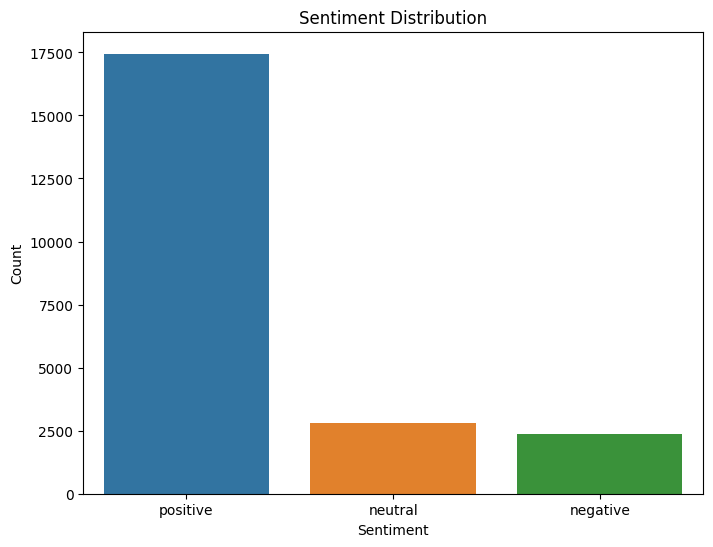

In [ ]:
sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sentiment', order=sentiment_counts.index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


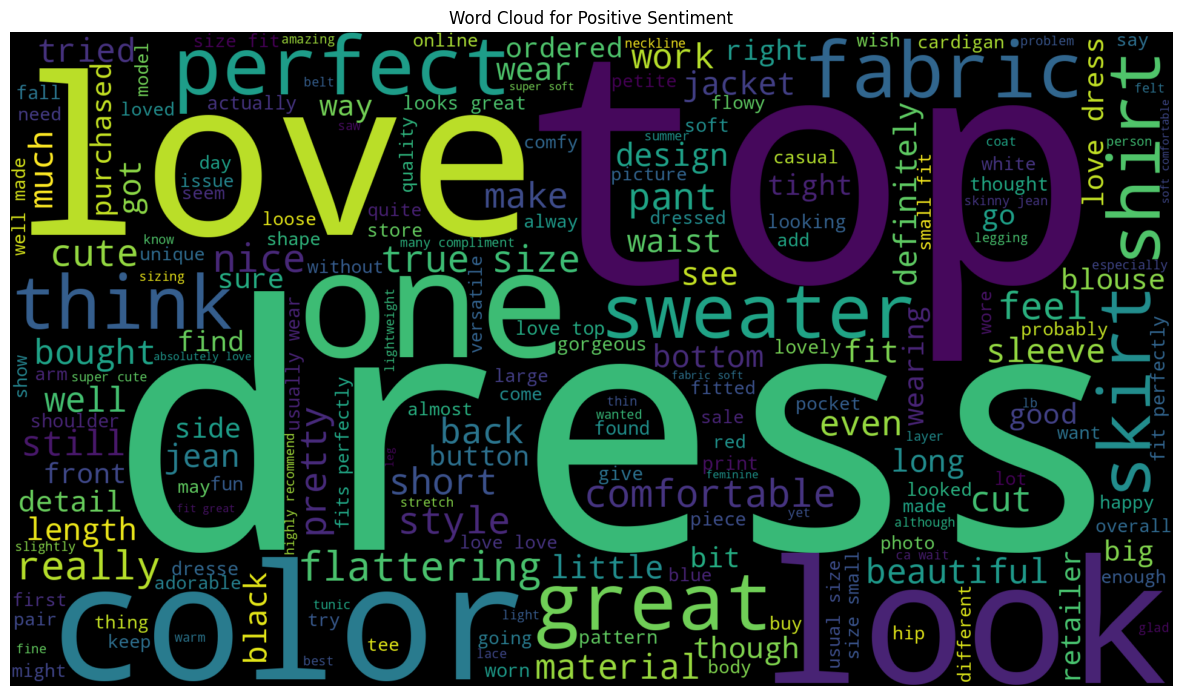

In [ ]:
from wordcloud import WordCloud

positive_reviews = ' '.join(data[data['sentiment'] == 'positive']['review_text'])

wordcloud_positive = WordCloud(width=1920, height=1080).generate(positive_reviews)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

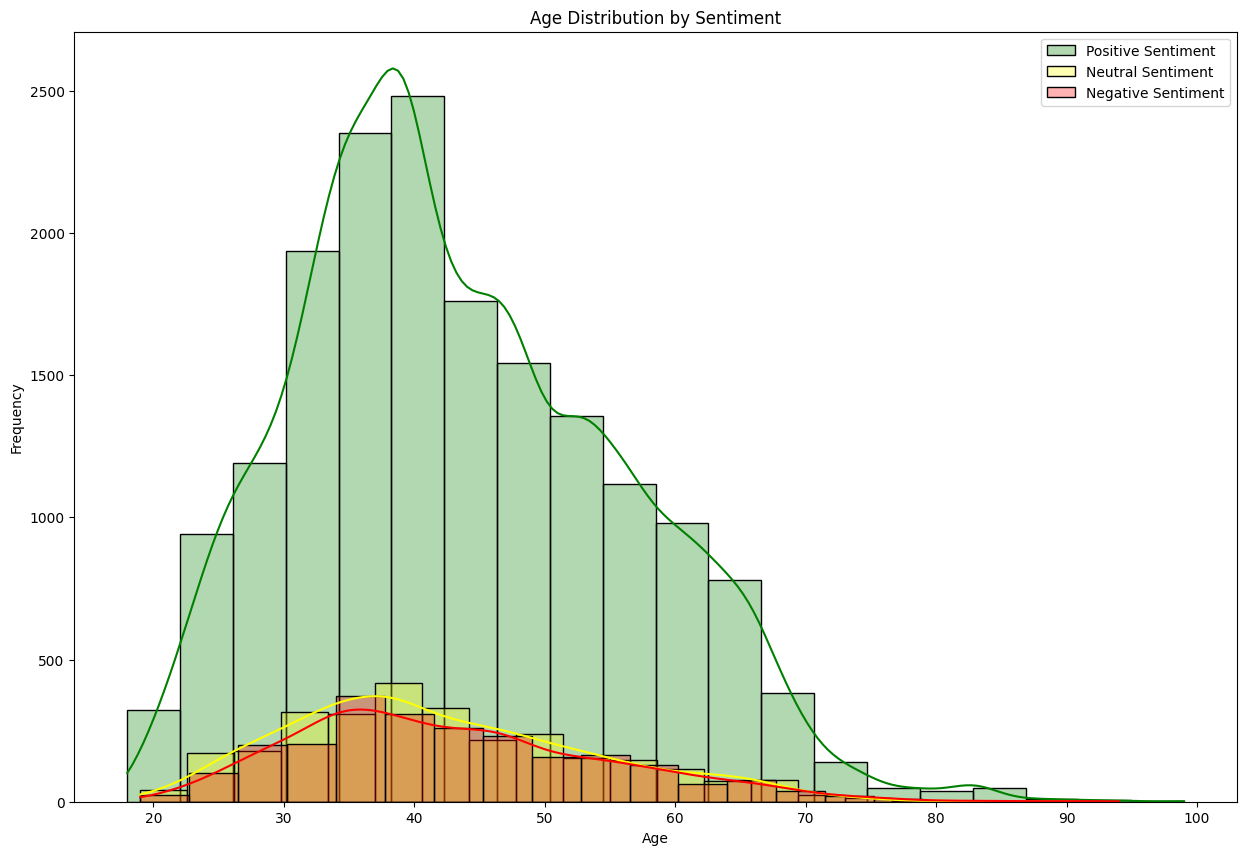

In [ ]:
positive_age = data[data['sentiment'] == 'positive']['age']
neutral_age = data[data['sentiment'] == 'neutral']['age']
negative_age = data[data['sentiment'] == 'negative']['age']


plt.figure(figsize=(15, 10))
sns.histplot(positive_age, bins=20, kde=True, color='green', label='Positive Sentiment', alpha=0.3)
sns.histplot(neutral_age, bins=20, kde=True, color='yellow', label='Neutral Sentiment', alpha=0.3)
sns.histplot(negative_age, bins=20, kde=True, color='red', label='Negative Sentiment', alpha=0.3)

plt.title('Age Distribution by Sentiment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
department_data =data.groupby(['department_name', 'sentiment']).size()
department_data

department_name  sentiment
Bottoms          negative      317
                 neutral       407
                 positive     2938
Dresses          negative      681
                 neutral       830
                 positive     4634
Intimates        negative      147
                 neutral       177
                 positive     1329
Jackets          negative      108
                 neutral        90
                 positive      804
Not Given        negative        0
                 neutral         0
                 positive       13
Tops             negative     1096
                 neutral      1300
                 positive     7652
Trend            negative       21
                 neutral        19
                 positive       78
dtype: int64

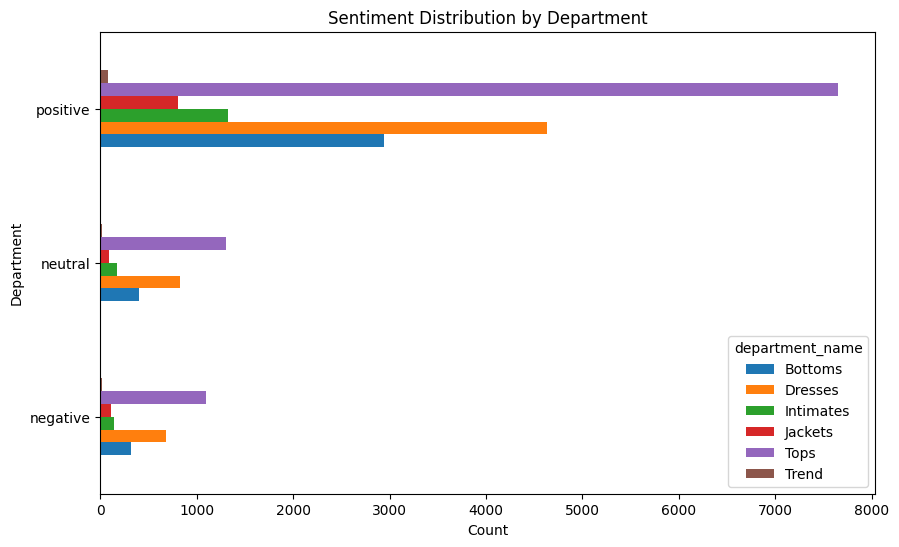

In [ ]:
filtered_data = department_data[department_data.index.get_level_values('department_name') != 'Not Given']
filtered_data.unstack(level=0).plot(kind='barh', figsize=(10, 6))
plt.title('Sentiment Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()

In [ ]:
sorted_class = data.groupby(['class_name', 'sentiment'])['review_text'].count().unstack().sort_values(by='positive', ascending=False).head(10)
sorted_class

sentiment   negative  neutral  positive
class_name                             
Dresses          681      830      4634
Knits            498      605      3523
Blouses          343      384      2256
Pants            122      154      1074
Sweaters         151      193      1036
Jeans             85      110       909
Fine gauge       104      118       837
Skirts            85      104       714
Jackets           72       61       550
Lounge            46       78       545

<Figure size 1200x800 with 0 Axes>

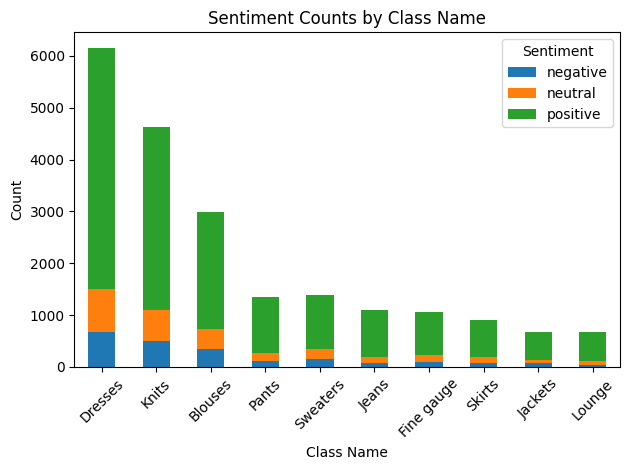

In [ ]:
plt.figure(figsize=(12, 8))
sorted_class.plot(kind='bar', stacked=True)
plt.title('Sentiment Counts by Class Name')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

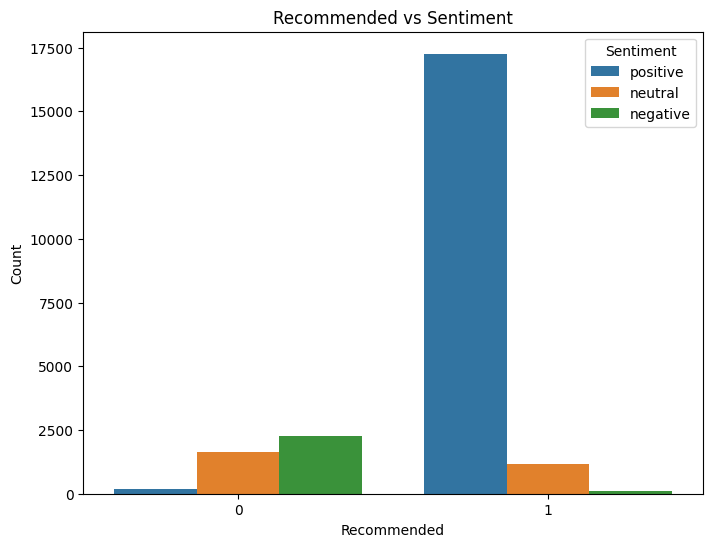

In [ ]:
#Validation
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='recommended_ind', hue='sentiment')
plt.title('Recommended vs Sentiment')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
data['sentiment_numeric'] = data['sentiment'].map(sentiment_mapping)
data

clothing_id  age                                              title  \
0              767   33                                           No Title   
1             1080   34                                           No Title   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             review_text  rating  \
0            absolutely wonderful silky sexy comfortable       4   
1      love dress sooo pretty happened find store gla...       5   
2      high hopes dress really wanted work initially ...       3   
3      love love love jumpsuit fun flirty fabulous ev...       5   
4      shirt flattering due adjustable front tie perf...       5   
...                                                  ...     ...   
23481  happy snag dress great price easy slip flatter...       5   
23482  reminds maternity clothes soft stretchy shiny ...       3   
23483  fit well top see never would worked glad able ...       3   
23484  bought dress wedding summer cute unfortunately...       3   
23485  dress lovely platinum feminine fits perfectly ...       5   

       recommended_ind  positive_feedback_count   division_name  \
0                    1                        0       Intimates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      department_name class_name  text_length  \
0           Intimates  Intimates           43   
1             Dresses    Dresses          178   
2             Dresses    Dresses          300   
3             Bottoms      Pants           89   
4                Tops    Blouses          112   
...               ...        ...          ...   
23481         Dresses    Dresses           65   
23482            Tops      Knits          161   
23483         Dresses    Dresses           97   
23484         Dresses    Dresses          241   
23485         Dresses    Dresses           78   

                                              wordcounts sentiment  \
0      {'absolutely': 1, 'comfortable': 1, 'sexy': 1,...  positive   
1      {'bc': 2, 'bought': 1, 'definitely': 1, 'dress...  positive   
2      {'bottom': 1, 'cheap': 1, 'comfortable': 1, 'c...   neutral   
3      {'compliments': 1, 'every': 1, 'fabulous': 1, ...  positive   
4      {'adjustable': 1, 'cardigan': 1, 'due': 1, 'fl...  positive   
...                                                  ...       ...   
23481  {'color': 1, 'combo': 1, 'cut': 1, 'dress': 1,...  positive   
23482  {'awkward': 1, 'button': 1, 'close': 1, 'cloth...   neutral   
23483  {'able': 1, 'different': 1, 'fabric': 1, 'fit'...   neutral   
23484  {'big': 1, 'bought': 1, 'bust': 1, 'cheaper': ...   neutral   
23485  {'comfy': 1, 'dress': 1, 'easy': 1, 'feminine'...  positive   

       sentiment_n

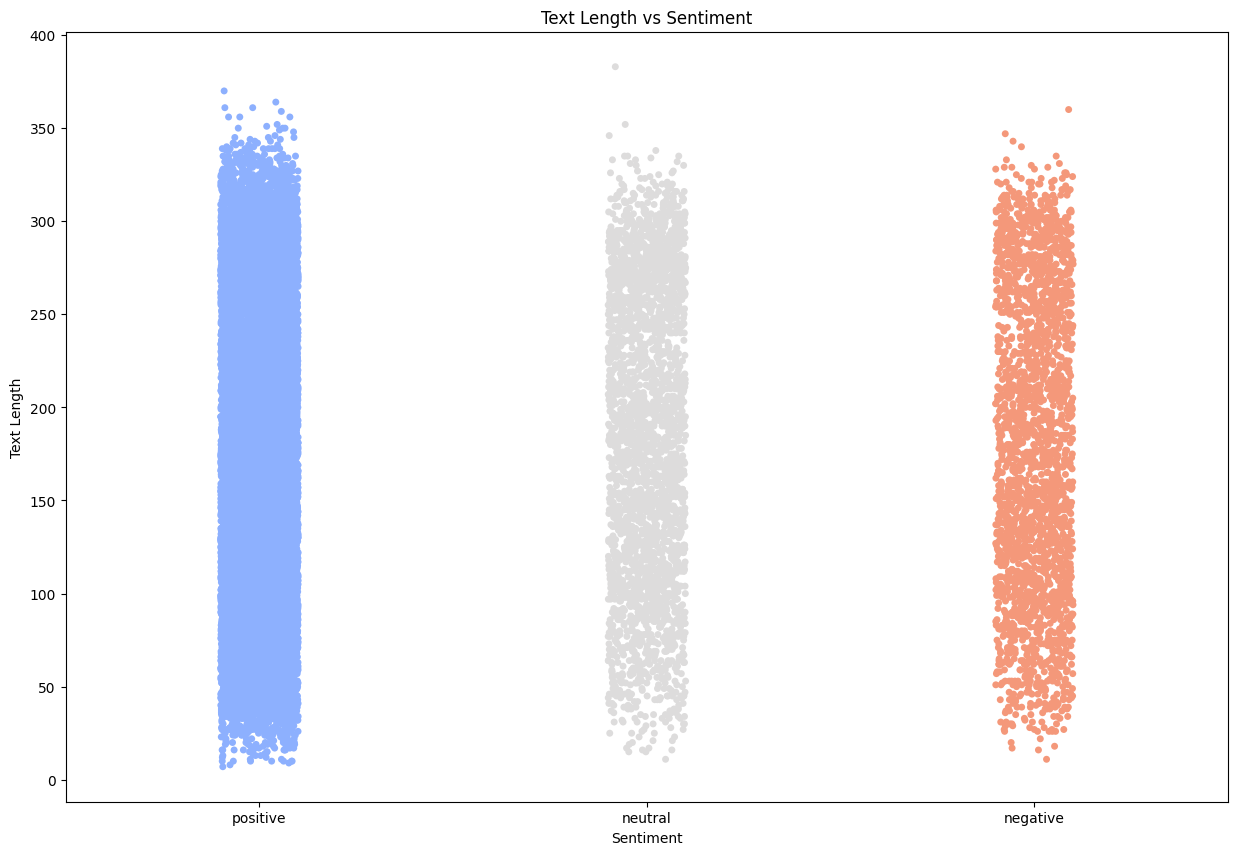

In [ ]:
plt.figure(figsize=(15, 10))
sns.stripplot(data=data, x='sentiment', y='text_length', jitter=True, palette='coolwarm')
plt.title('Text Length vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

In [ ]:
avg_text_length = data.groupby('sentiment')['text_length'].mean()
avg_text_length

sentiment
negative    179.458650
neutral     185.168615
positive    176.337861
Name: text_length, dtype: float64